# The Reparametrization Trick

Reparameterization trick used by Kingma and Welling (2014) to train their variational autoencoder.

Assuming a normal distribution $q$ parametrized by $\theta$, we want to solve
$$
\min_\theta \mathbb{E}_q[x^2]
$$ 
Which is rather silly to solve. 
Usually to calculate $\nabla_\theta E_q[x^2]$ we have
$$
\nabla_\theta \mathbb{E}_{q_\theta}[x^2] = \mathbb{E}_{q_\theta}[x^2 \nabla_\theta \log q_\theta(x)]
$$
which make use of the trick $\nabla_\theta q_\theta = q_\theta \nabla_\theta \log q_\theta$ used in the REINFORCE algorithm in policy gradient

Reparameterization trick is a way to rewrite the expectation so that the distribution with respect to which we take the expectation is independent of parameter $\theta$. To achieve this, we need to make the stochastic element in q independent of $\theta$ $x=\theta + \epsilon, \epsilon \sim \mathcal{N}(0,1)$. So we can write
$$
E_q[x^2]=E_p[(\theta + \epsilon) ^ 2]
$$

In [12]:
import numpy as np
N = 1000
theta = 2.0

rng = np.random.default_rng(seed=17)


x = rng.standard_normal(size=N) + theta
eps = np.random.randn(N)

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size

print(grad1(x))
print(grad2(eps))


4.193008560209942
4.150130704430521


Variance for different sample sizes

In [13]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    
print(means1)
print(means2)
print(vars1)
print(vars2)

[4.21783952 4.06937007 3.98051731 4.00983789 4.00087405]
[3.96696983 3.99853081 3.99787424 4.00327636 3.9996026 ]
[9.25969190e+00 9.03966164e-01 9.67799439e-02 8.13138679e-03
 9.07473486e-04]
[3.57896332e-01 3.44331890e-02 5.00044034e-03 4.22603894e-04
 4.54297479e-05]


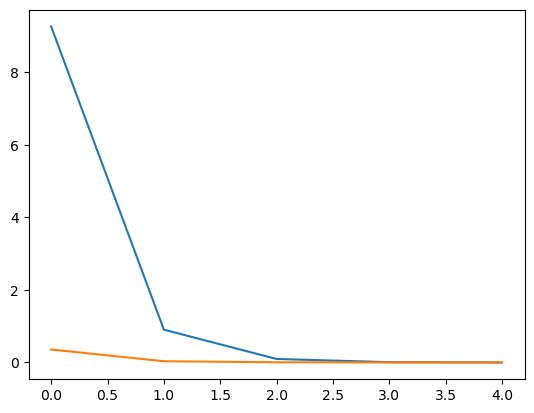

In [15]:
import matplotlib.pyplot as plt

plt.plot(vars1)
plt.plot(vars2);

source: https://gokererdogan.github.io/2016/07/01/reparameterization-trick/